In [94]:
import pandas as pd
import numpy as np

In [95]:
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')

In [96]:
myresults=pd.read_pickle('data/match_predictions.pkl')

In [97]:
myresults=myresults.reset_index(drop=True)

In [98]:
myresults

,Date,HomeTeam,AwayTeam,FTR,season,B365H,B365D,B365A,MaxH,AvgH,MaxD,AvgD,MaxA,AvgA,predictions,proba_H,proba_D,proba_A
0,2023-08-11,Burnley,Man City,A,season23,8.00,5.50,1.33,9.50,9.02,5.68,5.35,1.39,1.35,A,0.208388,0.243915,0.547697
1,2023-08-12,Arsenal,Nott'm Forest,H,season23,1.18,7.00,15.00,1.21,1.18,8.50,7.64,17.50,15.67,H,0.658375,0.171784,0.169841
2,2023-08-12,Bournemouth,West Ham,D,season23,2.70,3.40,2.55,2.80,2.69,3.62,3.44,2.75,2.64,A,0.340656,0.311815,0.347529
3,2023-08-12,Brighton,Luton,H,season23,1.33,5.50,9.00,1.36,1.33,6.00,5.52,10.50,9.61,H,0.544671,0.245741,0.209588
4,2023-08-12,Everton,Fulham,A,season23,2.20,3.40,3.30,2.30,2.24,3.57,3.43,3.45,3.30,H,0.364506,0.303388,0.332106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2024-05-19,Crystal Palace,Aston Villa,H,season23,1.85,4.33,3.60,1.93,1.87,4.50,4.28,3.84,3.67,H,0.429992,0.279912,0.290096
376,2024-05-19,Liverpool,Wolves,H,season23,1.17,8.00,15.00,1.18,1.16,10.00,8.71,17.00,14.55,H,0.586533,0.227369,0.186098
377,2024-05-19,Luton,Fulham,A,season23,2.90,3.90,2.20,3.00,2.92,4.35,3.95,2.30,2.23,A,0.321672,0.255968,0.422360
378,2024-05-19,Man City,West Ham,H,season23,1.08,12.00,21.00,1.11,1.10,14.00,11.72,25.00,21.81,H,0.601762,0.230930,0.167309


In [99]:
resultsubset=myresults[['Date', 'FTR', 'HomeTeam', 'AwayTeam', 'season', 'predictions', 'proba_H', 'proba_D', 'proba_A']]

In [100]:
resultsubset

,Date,FTR,HomeTeam,AwayTeam,season,predictions,proba_H,proba_D,proba_A
0,2023-08-11,A,Burnley,Man City,season23,A,0.208388,0.243915,0.547697
1,2023-08-12,H,Arsenal,Nott'm Forest,season23,H,0.658375,0.171784,0.169841
2,2023-08-12,D,Bournemouth,West Ham,season23,A,0.340656,0.311815,0.347529
3,2023-08-12,H,Brighton,Luton,season23,H,0.544671,0.245741,0.209588
4,2023-08-12,A,Everton,Fulham,season23,H,0.364506,0.303388,0.332106
...,...,...,...,...,...,...,...,...,...
375,2024-05-19,H,Crystal Palace,Aston Villa,season23,H,0.429992,0.279912,0.290096
376,2024-05-19,H,Liverpool,Wolves,season23,H,0.586533,0.227369,0.186098
377,2024-05-19,A,Luton,Fulham,season23,A,0.321672,0.255968,0.422360
378,2024-05-19,H,Man City,West Ham,season23,H,0.601762,0.230930,0.167309


I will focus on comparing my probablities to bet365's for now. I will drop the other betting columns

In [101]:
myresults.drop(columns=['MaxH', 'AvgH' , 'MaxD', 'AvgD', 'MaxA', 'AvgA'], inplace=True)

I will convert the bet365 columns into implied probability and then compare to my probabilities

In [102]:
myresults[['B365H_implied', 'B365D_implied', 'B365A_implied']]=1/myresults[['B365H', 'B365D', 'B365A']]

In [103]:
myresults['B365_total_implied']=myresults[['B365H_implied', 'B365D_implied', 'B365A_implied']].sum(axis=1)

In [125]:
myresults['B365_total_implied']


0      1.058698
1      1.056981
2      1.056645
3      1.044809
4      1.051693
         ...   
375    1.049265
376    1.046368
377    1.055783
378    1.056878
379    1.061404
Name: B365_total_implied, Length: 380, dtype: float64

In [124]:
myresults['B365_total_implied'].mean()

1.0539718297865104

In [106]:
# Define a mapping from column names to results
column_to_result = {
    'B365H_implied': 'H',
    'B365D_implied': 'D',
    'B365A_implied': 'A'
}

# Find the column with the maximum value and map it to 'H', 'D', or 'A'
myresults['B365_prediction'] = myresults[['B365H_implied', 'B365D_implied', 'B365A_implied']].idxmax(axis=1).map(column_to_result)


In [107]:
len(myresults[myresults['B365_total_implied']<1.05])

103

In [108]:
# Create the 'betWinnings' column
myresults['betWinnings'] = np.where(
    myresults['predictions'] == myresults['FTR'],  # Check if the prediction matches the actual result
    myresults.apply(
        lambda row: 10 * row[f"B365{row['FTR']}"], axis=1  # Multiply by the corresponding odds column
    ),
    0  # If prediction is incorrect, winnings are 0
)

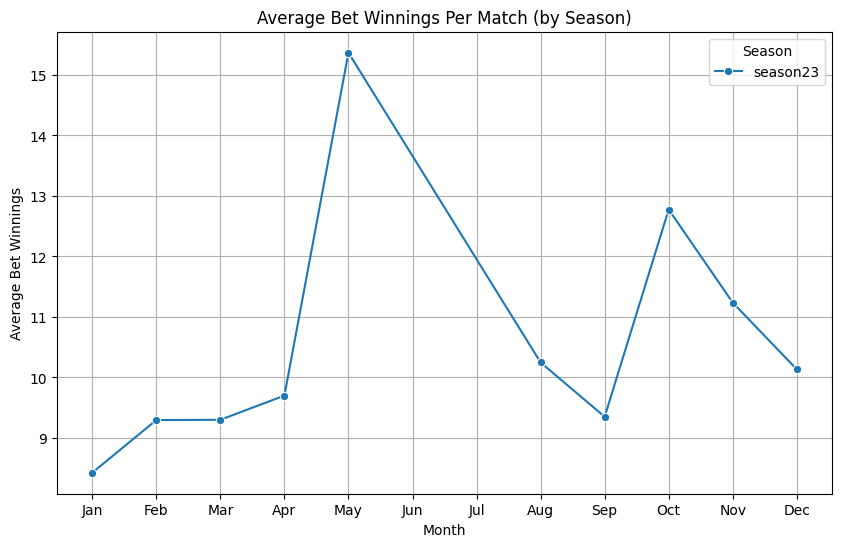

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped = (
    myresults.groupby(['season', myresults['Date'].dt.month.rename('Month')])['betWinnings']
    .mean()
    .reset_index(name='AverageBetWinnings')
)



# Step 2: Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Month', y='AverageBetWinnings', hue='season', marker='o')

# Customizing the plot
plt.title('Average Bet Winnings Per Match (by Season)')
plt.xlabel('Month')
plt.ylabel('Average Bet Winnings')
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Season')
plt.grid()

plt.show()


In [110]:
myresults.groupby(myresults['Date'].dt.to_period('M'))['betWinnings'].mean()

Date
2023-08    10.248276
2023-09     9.350000
2023-10    12.775758
2023-11    11.236667
2023-12    10.133333
2024-01     8.425000
2024-02     9.295238
2024-03     9.300000
2024-04     9.700000
2024-05    15.367647
Freq: M, Name: betWinnings, dtype: float64

In [ ]:
myresults

In [111]:
myresults['betWinnings'].sum()

4001.0

In [122]:
myresults[myresults['B365_total_implied']<1.05]['betWinnings']

3      13.3
9      13.3
15     16.7
19     12.9
22      0.0
       ... 
356    23.8
358     0.0
369    27.5
375    18.5
376    11.7
Name: betWinnings, Length: 103, dtype: float64

In [121]:
myresults[myresults['B365_total_implied']<1.05]['betWinnings'].sum()

969.4

In [88]:
myresults[
    ((myresults['predictions'] == 'H') & (myresults['B365_prediction'] == 'A')) |
    ((myresults['predictions'] == 'A') & (myresults['B365_prediction'] == 'H'))
]['betWinnings'].sum()

168.3

In [82]:
myresults[
    ((myresults['predictions'] == 'H') & (myresults['B365_prediction'] == 'A')) |
    ((myresults['predictions'] == 'A') & (myresults['B365_prediction'] == 'H'))
]

,Date,HomeTeam,AwayTeam,FTR,season,B365H,B365D,B365A,predictions,proba_H,proba_D,proba_A,B365H_implied,B365D_implied,B365A_implied,B365_total_implied,B365_prediction,betWinnings
29,2023-09-01,Luton,West Ham,A,season23,4.75,3.80,1.73,H,0.341156,0.340327,0.318517,0.210526,0.263158,0.578035,1.051719,A,0.0
50,2023-09-23,Luton,Wolves,D,season23,3.25,3.40,2.20,H,0.391302,0.326213,0.282485,0.307692,0.294118,0.454545,1.056355,A,0.0
79,2023-10-08,Arsenal,Man City,H,season23,2.90,3.30,2.40,H,0.377040,0.351175,0.271784,0.344828,0.303030,0.416667,1.064525,A,29.0
106,2023-11-04,Newcastle,Arsenal,H,season23,2.80,3.20,2.60,H,0.350108,0.308812,0.341080,0.357143,0.312500,0.384615,1.054258,A,28.0
147,2023-12-06,Man United,Chelsea,H,season23,2.88,3.40,2.45,H,0.345353,0.316069,0.338578,0.347222,0.294118,0.408163,1.049503,A,28.8
171,2023-12-23,West Ham,Man United,H,season23,2.60,3.60,2.60,A,0.334015,0.301932,0.364053,0.384615,0.277778,0.384615,1.047009,H,0.0
174,2023-12-23,Nott'm Forest,Bournemouth,A,season23,2.75,3.40,2.55,H,0.352110,0.322750,0.325139,0.363636,0.294118,0.392157,1.049911,A,0.0
201,2024-01-14,Everton,Aston Villa,D,season23,2.80,3.50,2.45,H,0.348285,0.320796,0.330919,0.357143,0.285714,0.408163,1.051020,A,0.0
216,2024-02-01,West Ham,Bournemouth,D,season23,2.40,3.75,2.75,A,0.363250,0.269776,0.366973,0.416667,0.266667,0.363636,1.046970,H,0.0
217,2024-02-01,Wolves,Man United,A,season23,2.63,3.60,2.55,H,0.348953,0.310998,0.340049,0.380228,0.277778,0.392157,1.050163,A,0.0


In [83]:
myresults[
    ((myresults['predictions'] == 'D')  |(myresults['B365_prediction'] == 'D'))
]['betWinnings'].sum()

98.0

In [84]:
myresults[
    ((myresults['predictions'] == 'D')  |(myresults['B365_prediction'] == 'D'))
]

,Date,HomeTeam,AwayTeam,FTR,season,B365H,B365D,B365A,predictions,proba_H,proba_D,proba_A,B365H_implied,B365D_implied,B365A_implied,B365_total_implied,B365_prediction,betWinnings
67,2023-10-01,Nott'm Forest,Brentford,D,season23,2.75,3.1,2.70,D,0.305801,0.347488,0.346711,0.363636,0.322581,0.370370,1.056587,A,31.0
75,2023-10-07,Crystal Palace,Nott'm Forest,D,season23,2.20,3.1,3.60,D,0.348247,0.369992,0.281761,0.454545,0.322581,0.277778,1.054904,H,31.0
347,2024-05-03,Luton,Everton,D,season23,2.60,3.6,2.55,D,0.333275,0.338458,0.328267,0.384615,0.277778,0.392157,1.054550,A,36.0
372,2024-05-19,Brighton,Man United,A,season23,2.15,4.0,2.90,D,0.342477,0.350862,0.306661,0.465116,0.250000,0.344828,1.059944,H,0.0


Should I bet on a draw when my odds differ with bet365?

In [90]:
# Create the 'betWinningsDraw' column
myresults['betWinningsDraw'] = np.where(
    'D' == myresults['FTR'],  # Check if the prediction matches the actual result
    myresults.apply(
        lambda row: 10 * row[f"B365{row['FTR']}"], axis=1  # Multiply by the corresponding odds column
    ),
    0  # If prediction is incorrect, winnings are 0
)

In [92]:
len(myresults[
    ((myresults['predictions'] == 'H') & (myresults['B365_prediction'] == 'A')) |
    ((myresults['predictions'] == 'A') & (myresults['B365_prediction'] == 'H'))
])

17

In [91]:
myresults[
    ((myresults['predictions'] == 'H') & (myresults['B365_prediction'] == 'A')) |
    ((myresults['predictions'] == 'A') & (myresults['B365_prediction'] == 'H'))
]['betWinningsDraw'].sum()

180.0

In [67]:
# Create the 'betWinnings' column
myresults['betWinningsBet365'] = np.where(
    myresults['B365_prediction'] == myresults['FTR'],  # Check if the prediction matches the actual result
    myresults.apply(
        lambda row: 10 * row[f"B365{row['FTR']}"], axis=1  # Multiply by the corresponding odds column
    ),
    0  # If prediction is incorrect, winnings are 0
)

In [68]:
myresults[
    ((myresults['predictions'] == 'H') & (myresults['B365_prediction'] == 'A')) |
    ((myresults['predictions'] == 'A') & (myresults['B365_prediction'] == 'H'))
]['betWinningsBet365'].sum()

174.5

In [63]:
myresults[myresults['predictions']=='D']['betWinnings']

67     31.0
347    36.0
363     0.0
Name: betWinnings, dtype: float64

In [70]:
myresults.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTR', 'season', 'B365H', 'B365D',
       'B365A', 'predictions', 'proba_H', 'proba_D', 'proba_A',
       'B365H_implied', 'B365D_implied', 'B365A_implied', 'B365_total_implied',
       'B365_prediction', 'betWinnings', 'betWinningsDraw',
       'betWinningsBet365'],
      dtype='object')

In [22]:
len(myresults[myresults['predictions']!=myresults['B365_prediction']])

781

In [23]:
myresults[myresults['predictions']!=myresults['B365_prediction']]['betWinnings'].sum()

211.6

In [24]:
myresults[myresults['proba_H']>myresults['B365H_implied']]['predictions'].value_counts()

predictions
H    83
A    52
Name: count, dtype: int64

In [25]:
myresults[myresults['proba_A']>myresults['B365A_implied']]['predictions'].value_counts()

predictions
H    72
A    59
Name: count, dtype: int64

In [26]:
myHomeBets=myresults[myresults['proba_H']>1.2*myresults['B365H_implied']]

In [27]:
myHomeBets=myHomeBets.copy()

In [28]:


myHomeBets['B365H_multiplied'] = np.where(myHomeBets['FTR'] == 'H', myHomeBets['B365H'] * 10, np.nan)


In [29]:
myHomeBets['B365H_multiplied'].sum()

31.0

In [30]:
#len(myHomeBets)

In [31]:
myAwayBets=myresults[myresults['proba_A']>1.1*myresults['B365A_implied']]

In [32]:
myAwayBets=myAwayBets.copy()

In [33]:
len(myAwayBets)

48

In [34]:
myAwayBets['B365A_multiplied'] = np.where(myAwayBets['FTR'] == 'A', myAwayBets['B365A'] * 10, np.nan)

In [35]:
myAwayBets['B365A_multiplied'].sum()

626.8

In [36]:
626.8/480

1.3058333333333332

## Checking if i should bet when i predict a 10% more likely outcome

In [18]:
myresults['check_condition'].value_counts()

check_condition
True     269
False    111
Name: count, dtype: int64

In [53]:
def get_triggered_clause(row):
    if row['proba_H'] > row['B365H_implied'] * 2:
        return 'H'
    elif row['proba_D'] > row['B365D_implied'] * 2:
        return 'D'
    elif row['proba_A'] > row['B365A_implied'] * 2:
        return 'A'
    return 'None'

In [54]:
myresults['check_condition'] = (
    (myresults['proba_H'] > myresults['B365H_implied'] * 2) |
    (myresults['proba_D'] > myresults['B365D_implied'] * 2) |
    (myresults['proba_A'] > myresults['B365A_implied'] * 2)
)

In [55]:
myresults['check_condition'].value_counts()

check_condition
False    335
True      45
Name: count, dtype: int64

In [56]:
myresults['triggered_clause'] = myresults.apply(get_triggered_clause, axis=1)

In [57]:
myresults['triggered_clause'].value_counts()

triggered_clause
None    335
A        32
H         7
D         6
Name: count, dtype: int64

In [58]:
def check_and_multiply(row):
    if row['triggered_clause'] == row['FTR']:
        if row['triggered_clause'] == 'H':
            return 10 * row['B365H']
        elif row['triggered_clause'] == 'D':
            return 10 * row['B365D']
        elif row['triggered_clause'] == 'A':
            return 10 * row['B365A']
    return 0  # Return 0 if they are not the same

In [59]:
myresults['calculated_value'] = myresults.apply(check_and_multiply, axis=1)

In [60]:
myresults['calculated_value'].sum()

120.0

In [61]:
myresults.groupby('triggered_clause')['calculated_value'].sum()

triggered_clause
A       120.0
D         0.0
H         0.0
None      0.0
Name: calculated_value, dtype: float64

In [93]:
myresults

,Date,HomeTeam,AwayTeam,FTR,season,B365H,B365D,B365A,predictions,proba_H,proba_D,proba_A,B365H_implied,B365D_implied,B365A_implied,B365_total_implied,B365_prediction,betWinnings,betWinningsDraw
0,2023-08-11,Burnley,Man City,A,season23,8.00,5.50,1.33,A,0.208388,0.243915,0.547697,0.125000,0.181818,0.751880,1.058698,A,13.3,0.0
1,2023-08-12,Arsenal,Nott'm Forest,H,season23,1.18,7.00,15.00,H,0.658375,0.171784,0.169841,0.847458,0.142857,0.066667,1.056981,H,11.8,0.0
2,2023-08-12,Bournemouth,West Ham,D,season23,2.70,3.40,2.55,A,0.340656,0.311815,0.347529,0.370370,0.294118,0.392157,1.056645,A,0.0,34.0
3,2023-08-12,Brighton,Luton,H,season23,1.33,5.50,9.00,H,0.544671,0.245741,0.209588,0.751880,0.181818,0.111111,1.044809,H,13.3,0.0
4,2023-08-12,Everton,Fulham,A,season23,2.20,3.40,3.30,H,0.364506,0.303388,0.332106,0.454545,0.294118,0.303030,1.051693,H,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2024-05-19,Crystal Palace,Aston Villa,H,season23,1.85,4.33,3.60,H,0.429992,0.279912,0.290096,0.540541,0.230947,0.277778,1.049265,H,18.5,0.0
376,2024-05-19,Liverpool,Wolves,H,season23,1.17,8.00,15.00,H,0.586533,0.227369,0.186098,0.854701,0.125000,0.066667,1.046368,H,11.7,0.0
377,2024-05-19,Luton,Fulham,A,season23,2.90,3.90,2.20,A,0.321672,0.255968,0.422360,0.344828,0.256410,0.454545,1.055783,A,22.0,0.0
378,2024-05-19,Man City,West Ham,H,season23,1.08,12.00,21.00,H,0.601762,0.230930,0.167309,0.925926,0.083333,0.047619,1.056878,H,10.8,0.0
